# Ames Housing Step-by-step - Exercise 7

## Use SHAP values to explain how features contribute to Sale Price prediction

Pieter Overdevest  
2024-02-09

For suggestions/questions regarding this notebook, please contact
[Pieter Overdevest](https://www.linkedin.com/in/pieteroverdevest/)
(pieter@innovatewithdata.nl).

### Introduction

In this exercise we predict the sale price by using a Random Forest model - as example of a blackbox model - with k-fold cross-validation and grid search on a small set of hyperparameters. The latter part was added to show you another example how to apply cross-validation and hyperparameter optimization.

### How to work with this Jupyter Notebook yourself?

- Get a copy of the repository (or 'repo') [discover-projects/ames-housing](https://github.com/EAISI/discover-projects/tree/main/ames-housing) from EAISI's GitHub site. This can be done by either cloning the repo or simply downloading the zip-file. Both options are explained in this Youtube video by [Coderama](https://www.youtube.com/watch?v=EhxPBMQFCaI). This exercise builds on the six exercises presented in the Ames Housing case in this repo.

- Copy this notebook in the folder 'ames-housing\\' to your own project folder.


### Use of ChatGPT, Cody, Copilot, ..

In case you want to use platforms like ChatGPT, Cody, or Copilot, here are some suggestions to enter:

* How to import random forrest regression model in python?
* What hyperparameters do I have access to in this model?
* Can you suggest a dictionary with some common ranges to use with these hyperparameters?
* How to use this model in conjunction with gridsearchcv?

Of course, these questions are already quite specific and when you start your questions might be more generic, like "How do I do check the performance on a range of hyperparameters". These examples show that also as you develop your knowledge, the likes of ChatGPT remain a good source for suggesting snippets of code.


### Two routes to proceed with this exercise

(1) You proceed with the notebook(s) that you developed for exercises 1-6. You copy the code snippets below to your notebook(s). Then, you use your own processed data.

(2) You proceed with this Jupyter Notebook. Copy 'dc-ames-housing-pieter-exercise-5-6.pkl' to the same folder where you store this notebook. You can find this so-called 'pickled' file in the folder '\example-solutions\ames-housing-pieter\data\' in repo [machine-learning-with-python-explainers](https://github.com/EAISI/machine-learning-with-python-explainers) on EAISI's GitHub site. Then, you load the pickled file in this notebook using the code below.

### Load objects from earlier exercises in case you follow route 2


In [ ]:
import pickle

with open('dc-ames-housing-pieter-exercise-5-6.pkl', 'rb') as pickle_file:
    dc_exercise_1_2_3 = pickle.load(pickle_file)

df_X_train_scaled = dc_exercise_1_2_3['df_X_train_scaled']
ps_y_log_train    = dc_exercise_1_2_3['ps_y_log_train']

### Exercise A - Construct a data frame holding the imputed numerical data of the Ames Housing data set (optionally, as a challenge, also include the one hot encoded neighborhoods). Perform a train/test split on the data frame you constructed. Since, the SHAP calculation are computer intensive, take the first 500 observations from the resulting training set (call it, `df_X_fraction`) and take the first 500 elements of the outcome variable from the training set (call it, `ps_y_fraction`).

### Exercise B - Run or copy/paste the content from the cell below to your notebook.

In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid:
dc_hyperparameter_ranges = {

    'bootstrap': [True,False], # Do we bootstrap samples, or not.
    'max_depth': [20],         # Maximum depth of each tree
    'min_samples_leaf': [4],   # Minimum number of samples required to be at a leaf node
    'min_samples_split': [4],  # Minimum number of samples required to split an internal node
    'n_estimators': [1000],    # Number of trees
    'max_features': ['auto'],  # Number of features to consider at each split
    'random_state': [42]       # Random state for reproducibility
}

# Perform a gridsearch on the random forest model:
gridsearch = GridSearchCV(
    estimator  = RandomForestRegressor(),
    param_grid = dc_hyperparameter_ranges,
    scoring    = 'neg_mean_squared_error',
    cv         = 5
)

# Use subset of training data to do a gridsearch on the random forest model:
gridsearch.fit(df_X_fraction, ps_y_fraction)

### Exercise C - Show the value of the `best_params` attribute of the `gridsearch` object. What do the attributes `best_params_` and `best_estimator_` refer to? Assign the value of the `best_estimator_` attribute to a new object called, `best_model`.

### Exercise D - Run copy/paste the content from the cell below to your notebook.

In [234]:
import shap
shap.initjs()

# Create SHAP object.
explainer = shap.Explainer(best_model)

# Create SHAP values.
shap_values = explainer.shap_values(df_X_fraction)

Copy/paste also the code in the cell below to your notebook and add missing pieces as requested in the exercises.

### Exercise E - Waterfall Plot

We can use the `waterfall plot` to visualise the SHAP values for a single observation. Run or copy/paste the content from the cell below to your notebook. The questions refer to this code cell and to the resulting plot.

1 - Define an object to which you assign the index of the data point you want to explain the prediction for. Assign the value to your object such that you can explain the prediction for the second observation in the data.

2 - Replace '...' by the object name you defined above.

3 - What is the value for explainer.expected_value[0]?

4 - Run the cell.

5 - What do you conclude from the resulting figure? Use: (1) the answer from question 3 and (2) the prediction for the second observation in the data.

For reference see also [API Reference of SHAP module](https://shap.readthedocs.io/en/latest/generated/shap.plots.waterfall.html).

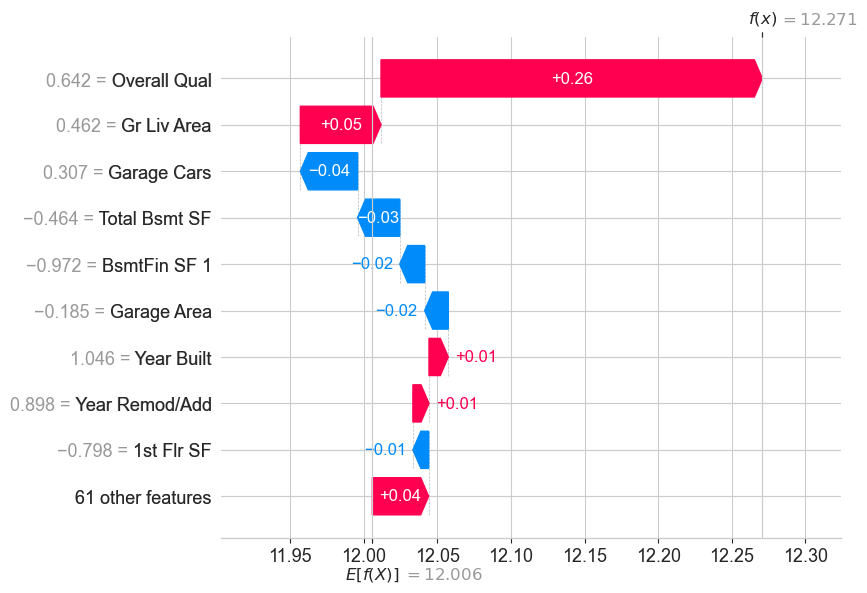

In [272]:
# Set index of data point you want to explain the prediction for.


# Plot waterfall
shap.plots.waterfall(
    
    shap.Explanation(
        base_values   = explainer.expected_value[0], # Mean prediction for the entire training data.
        values        = shap_values[...],            # Subset of shap values.
        data          = df_X_fraction.iloc[...],     # Subset of training data.
        feature_names = df_X_fraction.columns        # Feature names.
))

### Exercise F - Force Plot

Another way to visualise the SHAP values is by using a force plot. You can think of this as a condensed waterfall plot. Run or copy/paste the content from the cell below to your notebook. The questions refer to this code cell and to the resulting plot.

1 - The force plot is a different representation of the waterfall plot. Apply the questions from exercise 1 to the cell below.

In [273]:
# Set index of data point you want to explain the prediction for.


# Plot Force Plot.
shap.plots.force(

    base_value    = explainer.expected_value[0], # Mean prediction for the entire training data.
    shap_values   = shap_values[...],          # SHAP values.
    features      = df_X_fraction.iloc[...],   # Training data.
    feature_names = df_X_fraction.columns        # Feature names.
)

### Exercise G - Stacked Force Plot

Waterfall and force plots are great for interpreting individual predictions. To understand how our model makes predictions in general we need to aggregate the SHAP values. One way to do this is by using a stacked-force plot. We can combine multiple force plots together to create a stacked force plot. We can pass all SHAP values in the force plot function, or we can limit it, as we will do here. Each individual force plot is now vertical and stacked side by side. Run or copy/paste the content from the cell below to your notebook. The questions refer to this code cell and to the resulting plot.

1 - Show the SHAP values for the first 10 observations.

2 - Set the dropdown at the top of the figure to 'original sample ordering' and to the left of the figure to 'f(x)'. Look up the SHAP values for the observation with index 1. How do they compare to the number in exercise E and F?

3 - Set the dropdown at the top of the figure to 'sample order by output value'. What do you observe?

4 - Set the dropdown at the top of the figure to 'Overall Qual' and to the left of the figure to 'Overall Qual effects'. What do you observe?

In [271]:
# Plot stacked force plot.
shap.plots.force(
    
        base_value    = explainer.expected_value[0], # Mean prediction for the entire training data.
        shap_values   = shap_values,                 # SHAP values.
        features      = df_X_fraction,               # Training data.
        feature_names = df_X_fraction.columns        # Feature names.
)

### Exercise H - Mean SHAP

This next plot will tell us which variables are most important. For each variable, we calculate the mean SHAP value across all observations. Specifically, we take the mean of the absolute values as we do not want positive and negative values to offset each other. There is one bar for each variable. Run or copy/paste the content from the cell below to your notebook. The questions refer to this code cell and to the resulting plot.

1 - Run the cell. What do you conclude from the resulting chart?

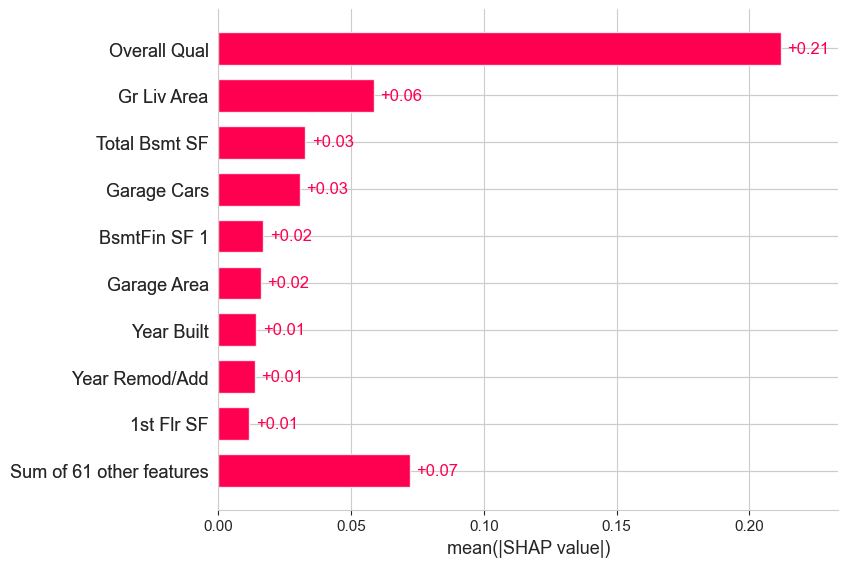

In [265]:
# Plot Mean SHAP.
shap.plots.bar(

    shap_values = shap.Explanation(
        base_values   = explainer.expected_value[0], # Mean prediction for the entire training data.
        values        = shap_values,                 # Subset of shap values.
        data          = df_X_fraction,               # Subset of training data.
        feature_names = df_X_fraction.columns        # Feature names.
))



### Exercise I - Beeswarm Plot

Next, we have the single most useful plot. The beeswarm visualises all of the SHAP values. Run or copy/paste the content from the cell below to your notebook. The questions refer to this code cell and to the resulting plot.

1 - Run the cell. What do you conclude from the resulting chart?

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


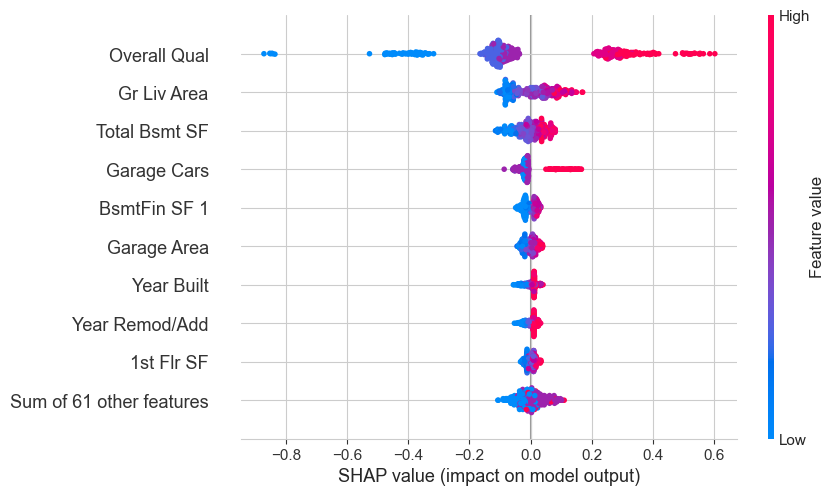

In [275]:
# Plot beeswarm plot.
shap.plots.beeswarm(
    
    shap.Explanation(
        base_values   = explainer.expected_value[0], # Mean prediction for the entire training data.
        values        = shap_values,                 # SHAP values.
        data          = df_X_fraction,               # Training data.
        feature_names = df_X_fraction.columns        # Feature names.
))